In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [ ]:
# Read the data
df = pd.read_csv('/content/student_dropout.csv')

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
df.rename(columns = {'Age at enrollment':'Age'}, inplace = True)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [ ]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [ ]:
# Label Encoder Target column
encode = {"Enrolled": 0, "Graduate": 1, "Dropout": 2}
df['Target'] = df['Target'].map(encode)

In [ ]:
df["Target"].value_counts()

,count
Target,
1,2209
2,1421
0,794


# Exploratory Data Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


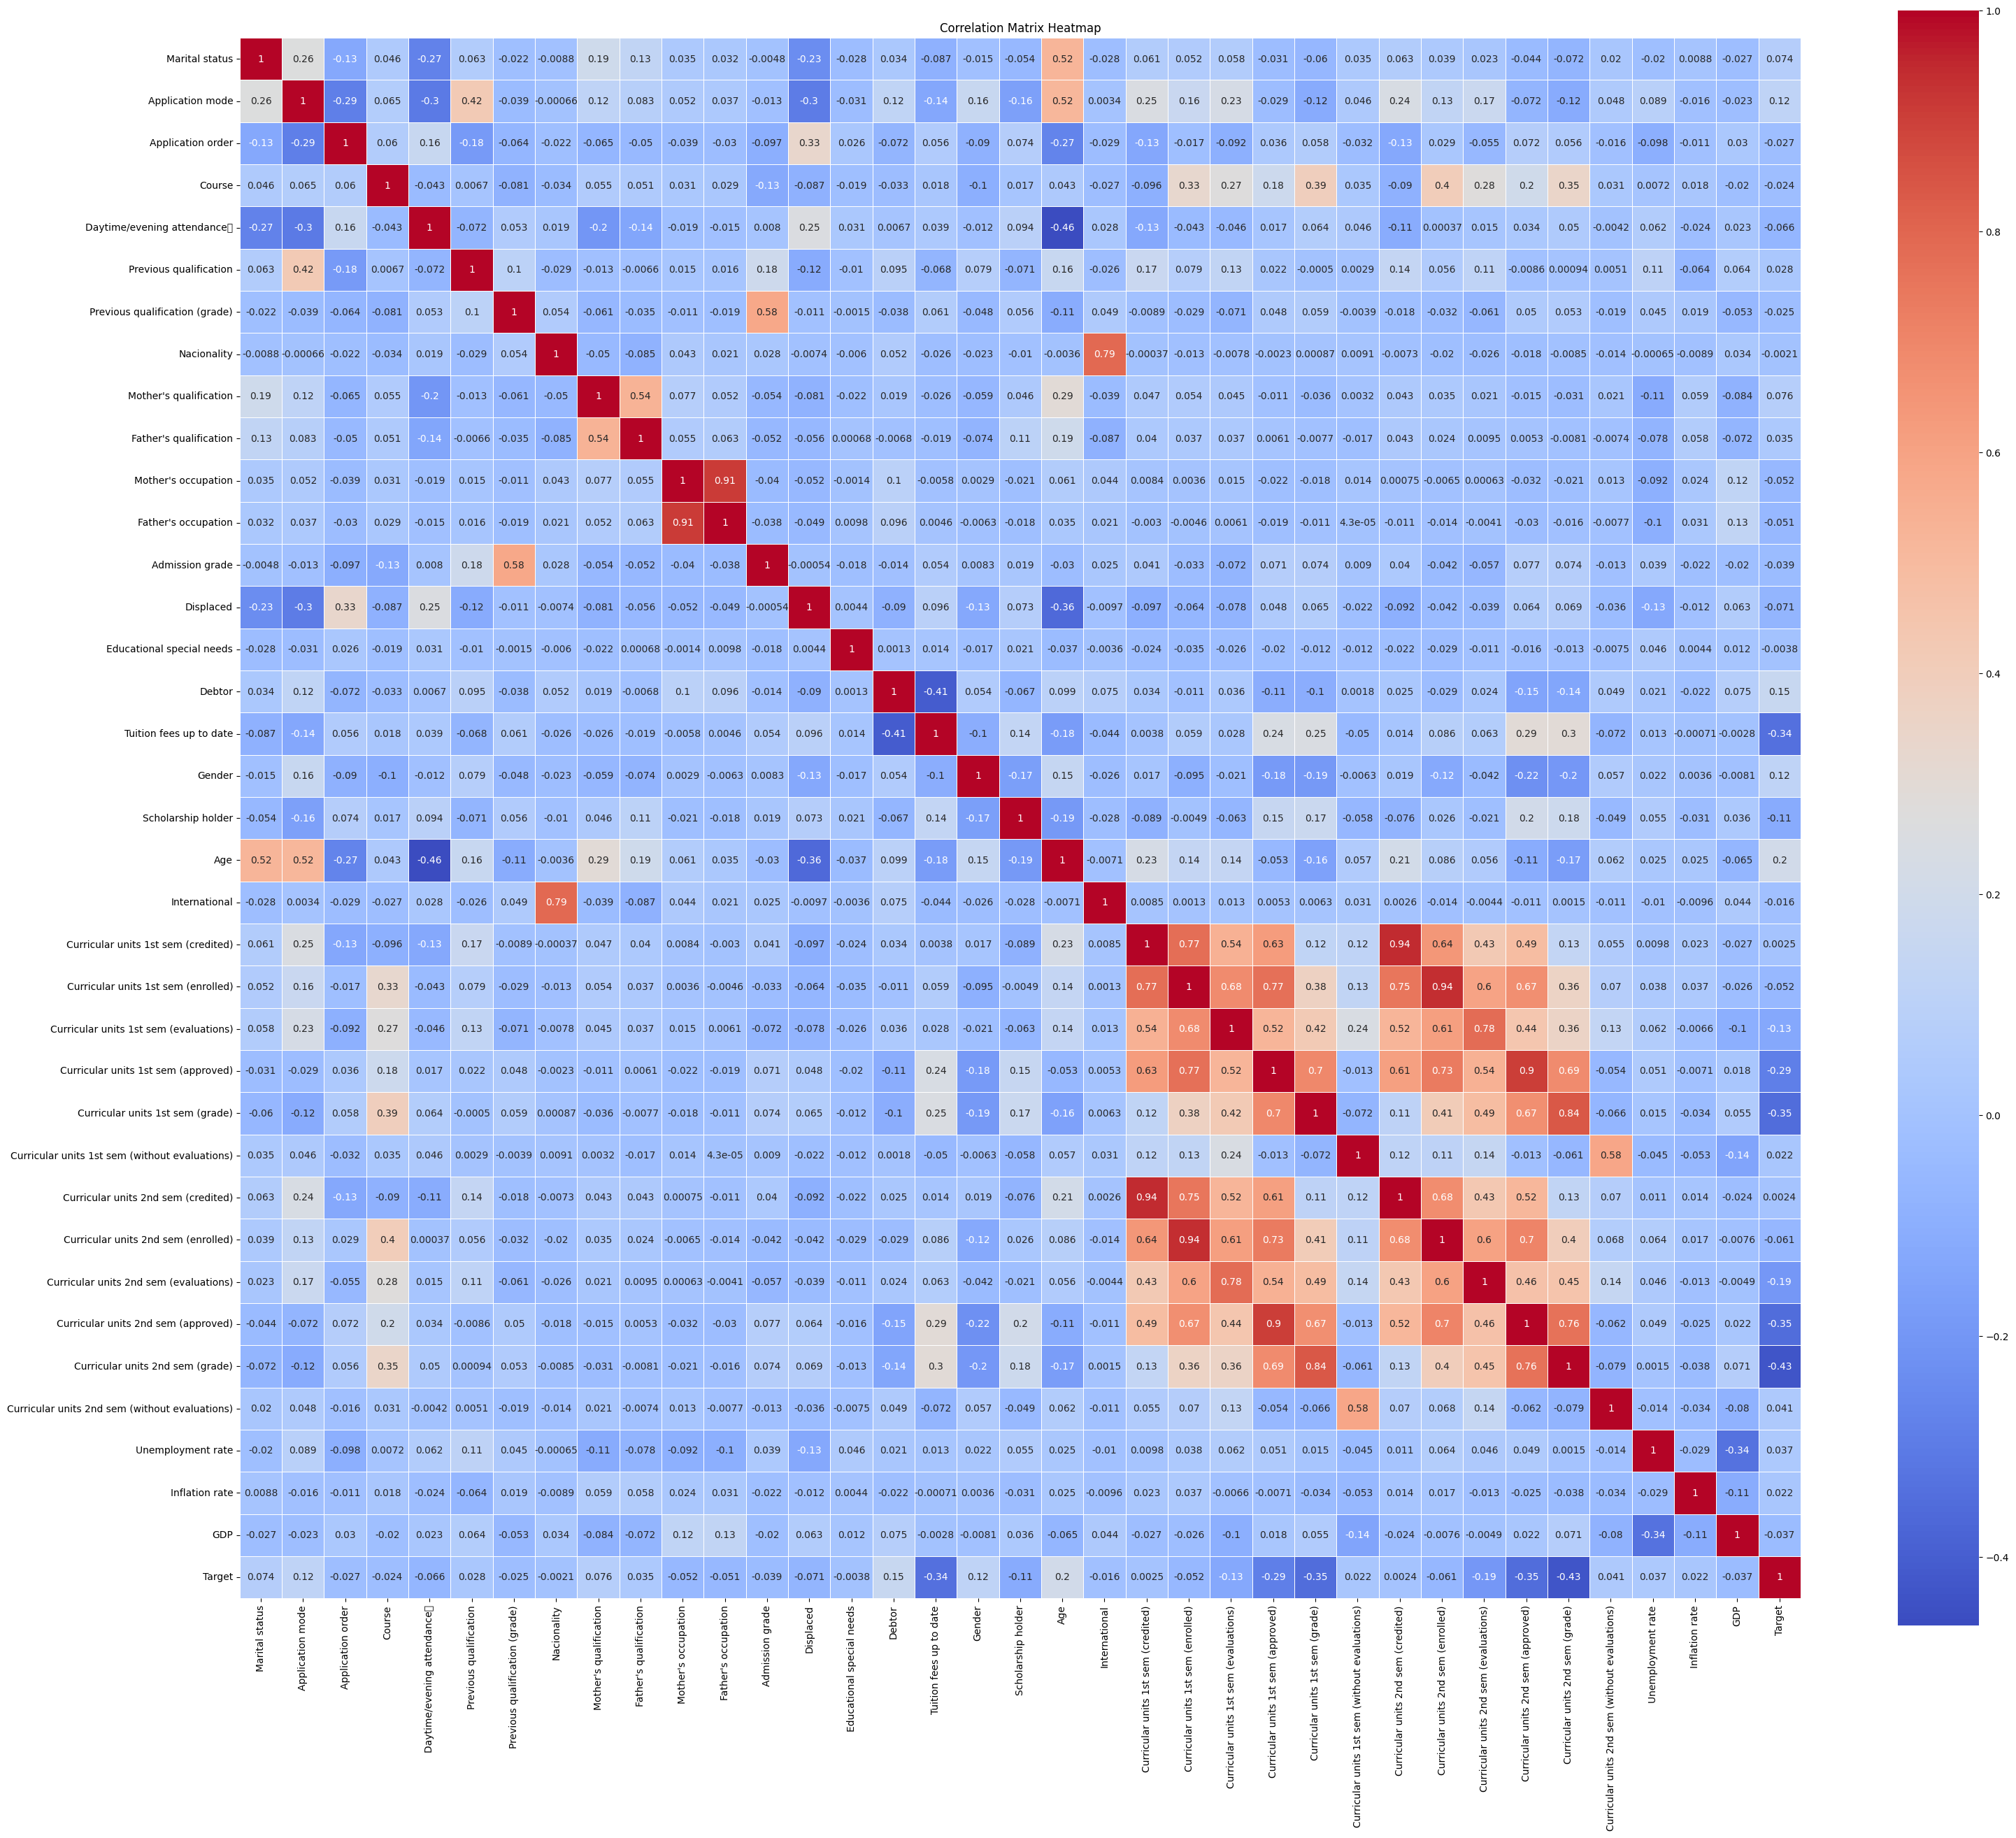

In [ ]:
#Correlation Matrix and Heatmap
corr = df.corr()
plt.figure(figsize = (36, 30))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidths = 0.5, square= True)
plt.title('Correlation Matrix Heatmap')

To decide which columns to remove based on low correlation with the target variable ('Target'), we can set a correlation threshold and remove columns with correlations below that threshold and columns that are likely not related to the students dropout. Here, we are removing columns with an absolute correlation coefficient less than 0.1

In [ ]:
# Get columns with correlation higher than or equal to 0.1
target_corr = corr['Target']
high_corr_cols = target_corr[target_corr.abs() >= 0.1]
high_corr_cols

,Target
Application mode,0.116928
Debtor,0.154802
Tuition fees up to date,-0.342121
Gender,0.118454
Scholarship holder,-0.114517
Age,0.201806
Curricular units 1st sem (evaluations),-0.125278
Curricular units 1st sem (approved),-0.290243
Curricular units 1st sem (grade),-0.349652
Curricular units 2nd sem (evaluations),-0.194412


In [ ]:
df = df[high_corr_cols.index]

In [ ]:
data_corr_descending_values = df.corr()['Target'].sort_values(ascending = False)
data_corr_descending = pd.DataFrame(data_corr_descending_values)

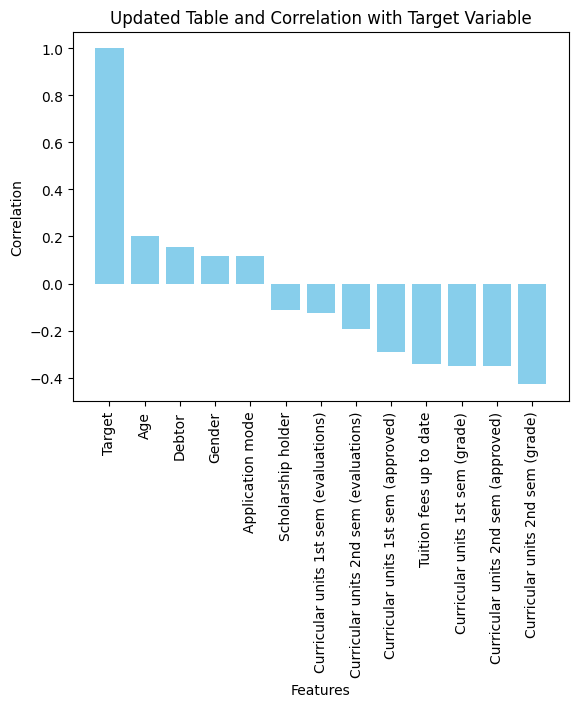

In [ ]:
plt.bar(data_corr_descending.index, data_corr_descending["Target"], color = 'skyblue')

# Add labels and title
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.title('Updated Table and Correlation with Target Variable')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation = 90)

# Show the plot
plt.show()

In [ ]:
df['Target'].value_counts()

,count
Target,
1,2209
2,1421
0,794


In [ ]:
# Check for duplicates
df.duplicated().sum()

147

In [ ]:
# Remove duplicated values
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
df['Target'].value_counts()

,count
Target,
1,2168
2,1323
0,786


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Application mode,4277.0,18.990414,17.527812,1.0,1.00,17.000000,39.000000,57.000000
Debtor,4277.0,0.116203,0.320506,0.0,0.00,0.000000,0.000000,1.000000
Tuition fees up to date,4277.0,0.879822,0.325207,0.0,1.00,1.000000,1.000000,1.000000
Gender,4277.0,0.350713,0.477249,0.0,0.00,0.000000,1.000000,1.000000
Scholarship holder,4277.0,0.254150,0.435433,0.0,0.00,0.000000,1.000000,1.000000
Age,4277.0,23.366846,7.653472,17.0,19.00,20.000000,25.000000,70.000000
Curricular units 1st sem (evaluations),4277.0,8.574702,3.961265,0.0,7.00,8.000000,10.000000,45.000000
Curricular units 1st sem (approved),4277.0,4.863923,3.021702,0.0,3.00,5.000000,6.000000,26.000000
Curricular units 1st sem (grade),4277.0,10.996538,4.507633,0.0,11.25,12.333333,13.428571,18.875000
Curricular units 2nd sem (evaluations),4277.0,8.332710,3.726487,0.0,6.00,8.000000,10.000000,33.000000


In [ ]:
df.columns

Index(['Application mode', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age', 'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Target'],
      dtype='object')

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Application mode,4277.0,18.990414,17.527812,1.0,1.00,17.000000,39.000000,57.000000
Debtor,4277.0,0.116203,0.320506,0.0,0.00,0.000000,0.000000,1.000000
Tuition fees up to date,4277.0,0.879822,0.325207,0.0,1.00,1.000000,1.000000,1.000000
Gender,4277.0,0.350713,0.477249,0.0,0.00,0.000000,1.000000,1.000000
Scholarship holder,4277.0,0.254150,0.435433,0.0,0.00,0.000000,1.000000,1.000000
Age,4277.0,23.366846,7.653472,17.0,19.00,20.000000,25.000000,70.000000
Curricular units 1st sem (evaluations),4277.0,8.574702,3.961265,0.0,7.00,8.000000,10.000000,45.000000
Curricular units 1st sem (approved),4277.0,4.863923,3.021702,0.0,3.00,5.000000,6.000000,26.000000
Curricular units 1st sem (grade),4277.0,10.996538,4.507633,0.0,11.25,12.333333,13.428571,18.875000
Curricular units 2nd sem (evaluations),4277.0,8.332710,3.726487,0.0,6.00,8.000000,10.000000,33.000000


In [ ]:
cols_to_plot = ["Application mode", 'Age', "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)",
                "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (grade)"]

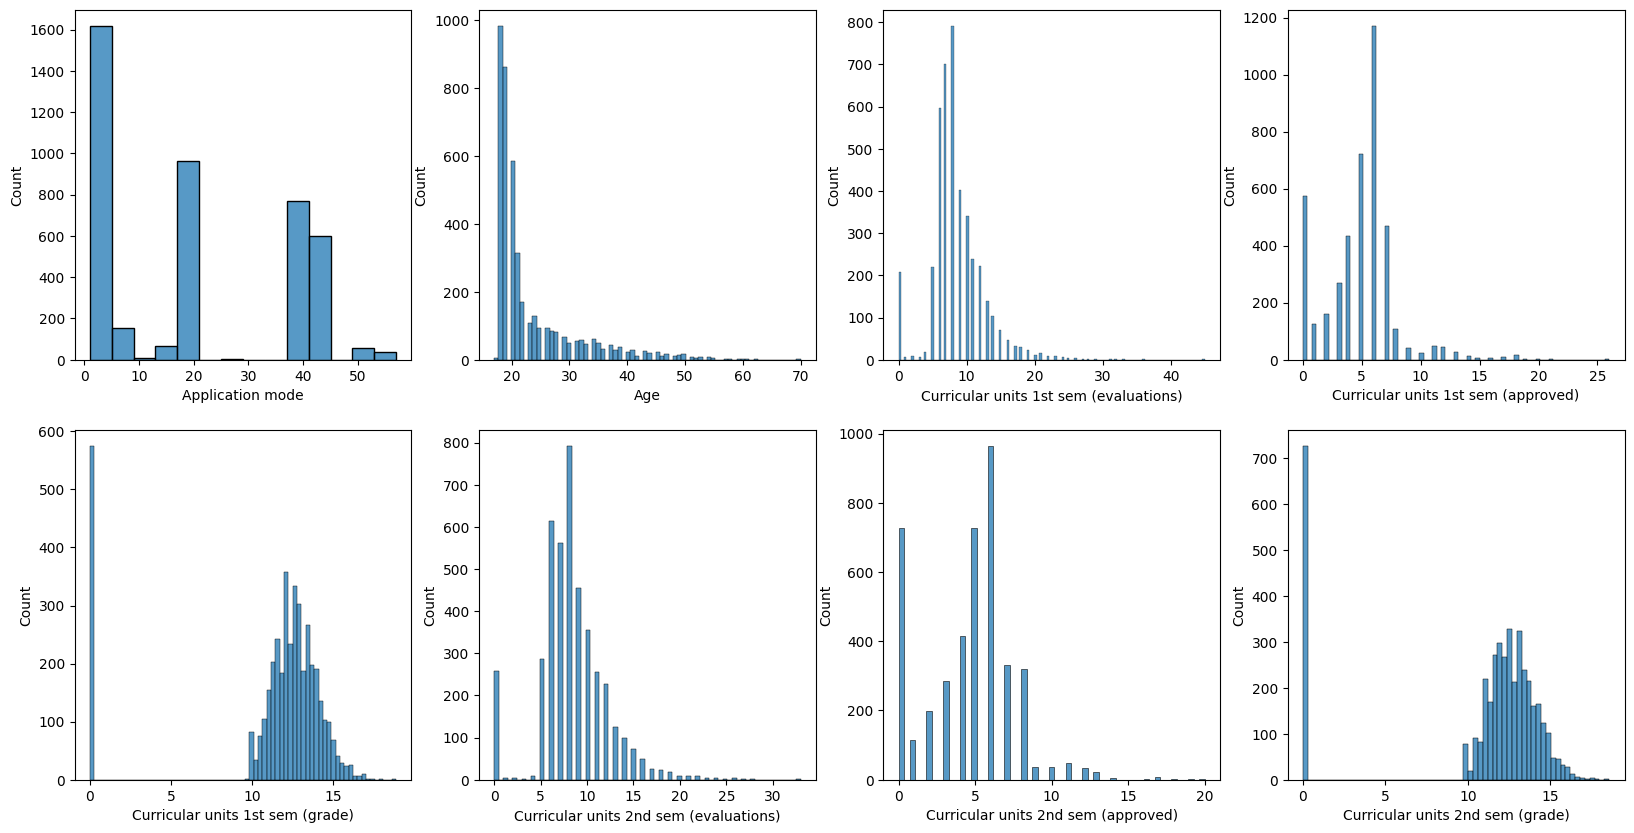

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
ax = ax.ravel()
for i, col in enumerate(cols_to_plot):
  sns.histplot(x = df[col], ax = ax[i])
# plt.tight_layout()
plt.show()

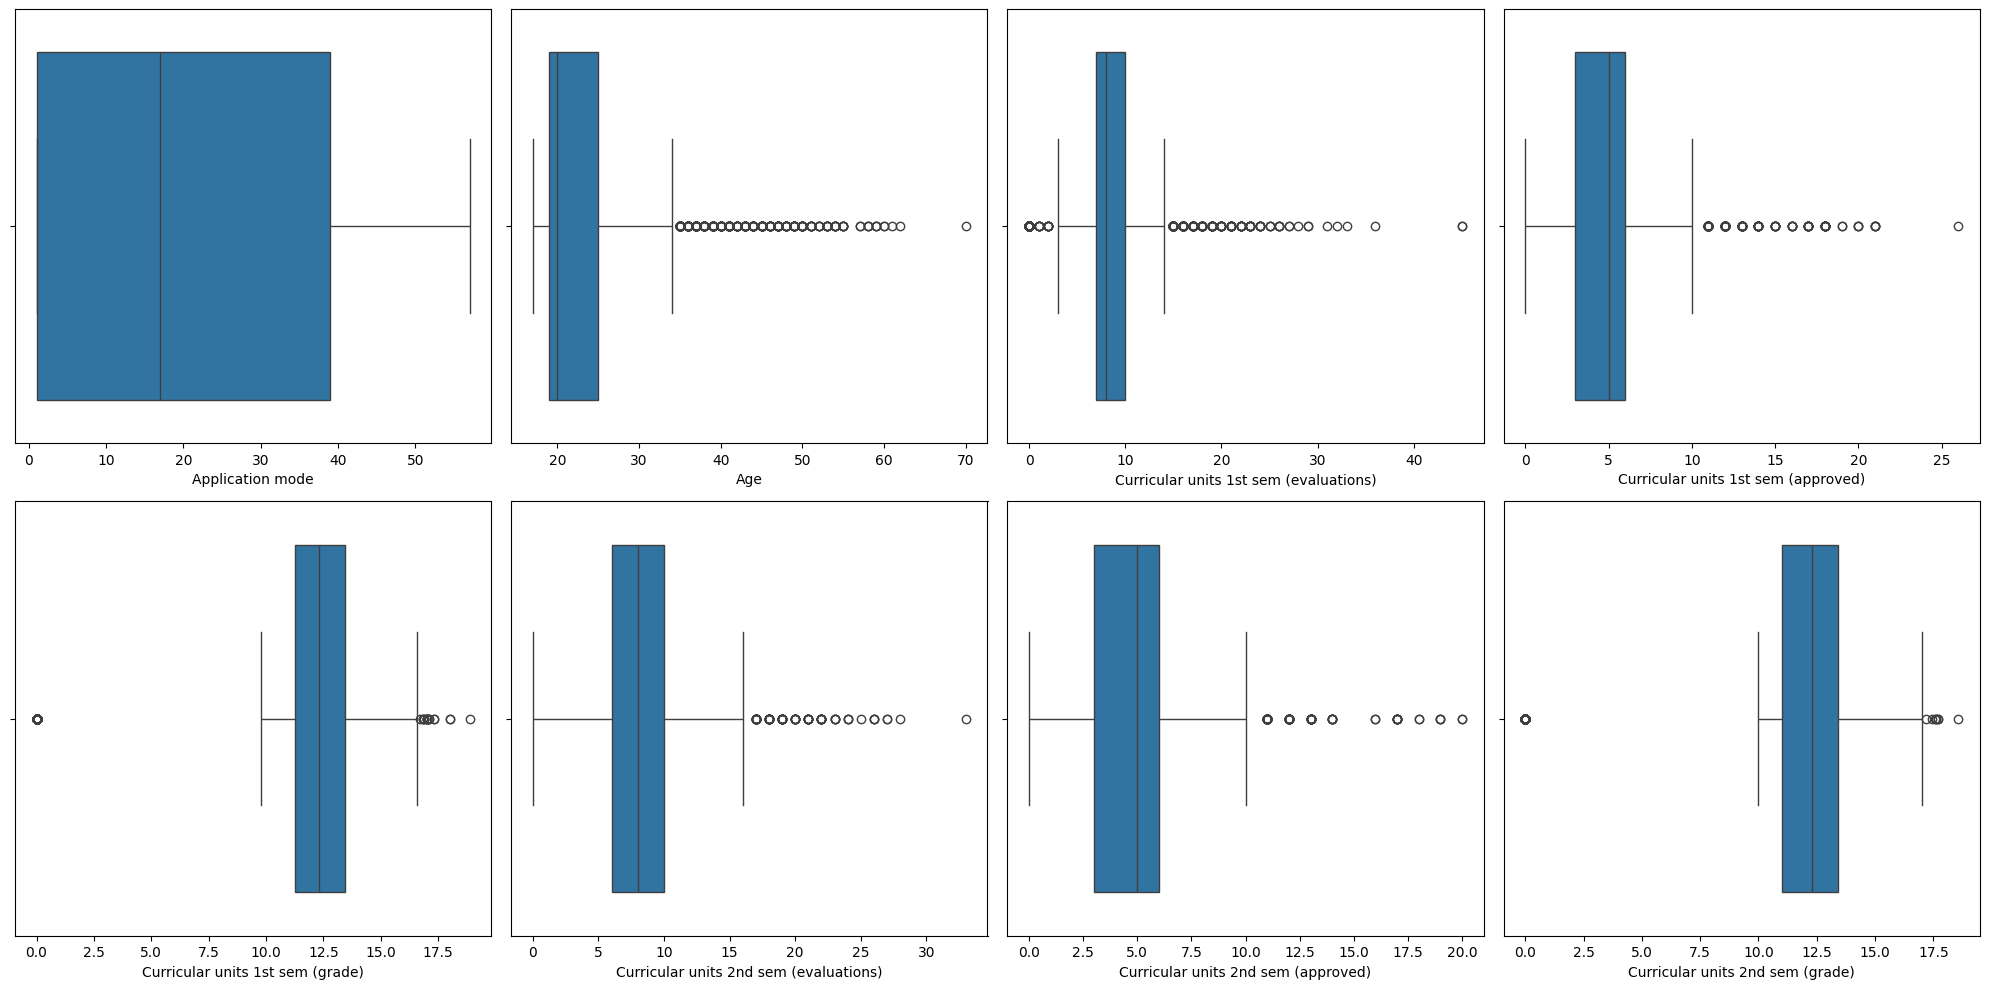

In [ ]:
# Check for outliers
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
ax = ax.ravel()
for i, col in enumerate(cols_to_plot):
  sns.boxplot(x = df[col], ax = ax[i])
plt.tight_layout()
plt.show()

## Preprocessing

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
# Scale the data
scale = RobustScaler()
df[cols_to_plot] = scale.fit_transform(df[cols_to_plot])

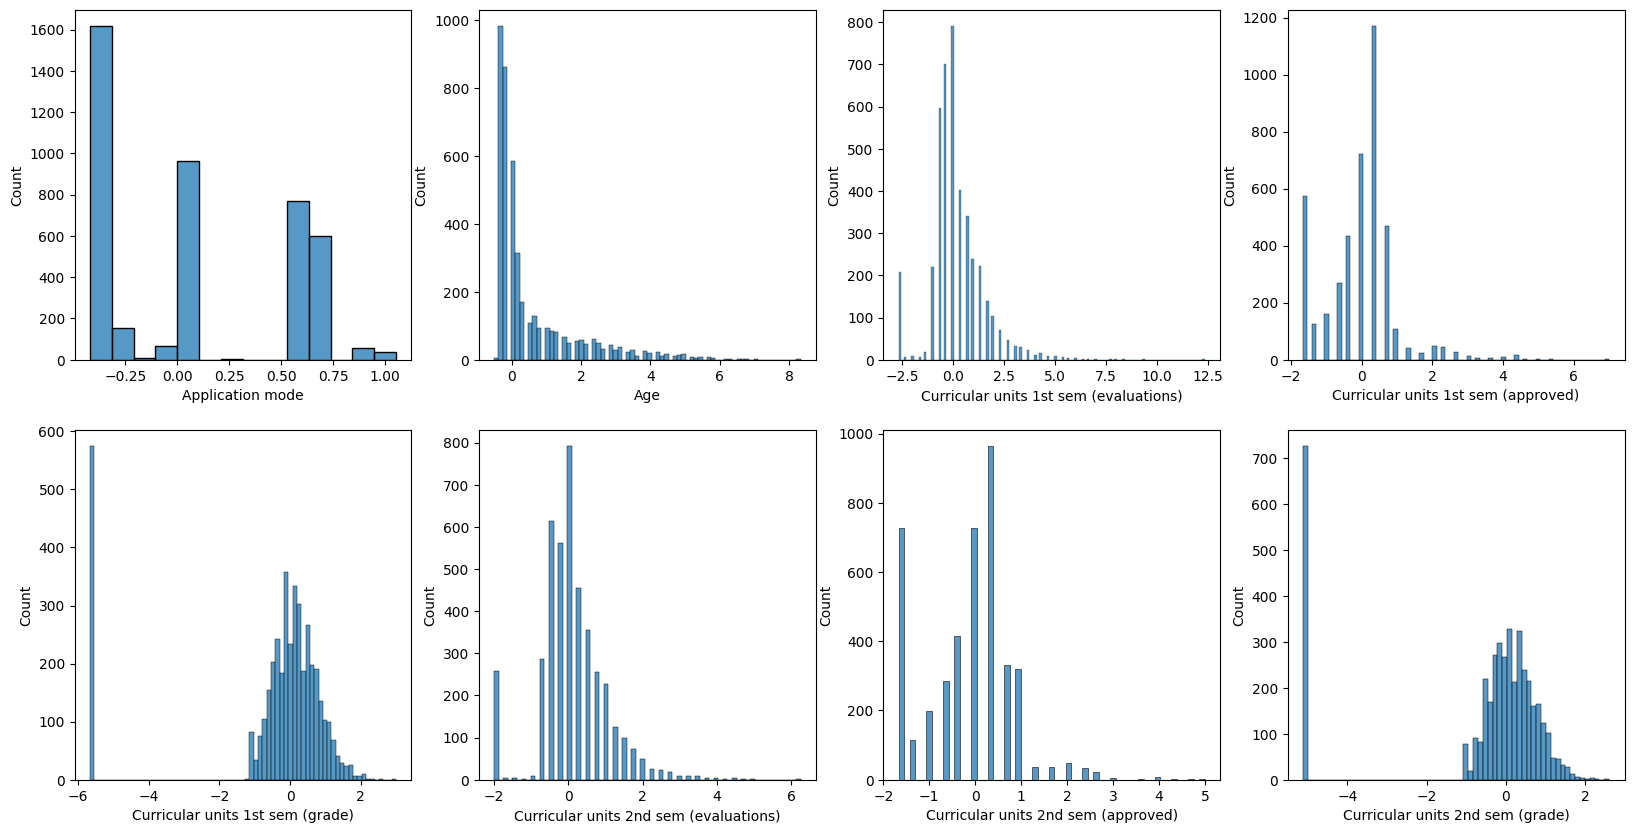

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
ax = ax.ravel()
for i, col in enumerate(cols_to_plot):
  sns.histplot(x = df[col], ax = ax[i])
# plt.tight_layout()
plt.show()

In [ ]:
X = df.drop('Target', axis = 1)
y = df['Target']

## Balance the data

In [ ]:
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [ ]:
# Spliting the dataset into traing and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 44, shuffle = True, stratify = y)

In [ ]:
y.value_counts()

,count
Target,
2,2168
1,2168
0,2168


## Model Selection

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = LR_model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 2, 1,
       1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 0,
       0, 2, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       2, 0, 1, 2, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2,
       0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       1, 2, 2, 1, 1, 0, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0,

In [ ]:
y

,Target
0,2
1,1
2,2
3,1
4,1
...,...
6499,2
6500,2
6501,2
6502,2


In [ ]:
LR_model.score(X_test, y_test)

0.7127496159754224

In [ ]:
LR_model.score(X_train, y_train)

0.7013497351785409

### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svc_model.predict(X_test)

In [ ]:
svc_model.score(X_test, y_test)

0.7204301075268817

In [ ]:
svc_model.score(X_train, y_train)

0.6941739279002221

### Random Forst

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_model = RandomForestClassifier(n_estimators = 60, criterion='log_loss')
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
# Test overfitting
print("Random Forest Train Score: ", RF_model.score(X_train, y_train))
print("Random Forest Test score: ", RF_model.score(X_test, y_test))

Random Forest Train Score:  0.9935076029386639
Random Forest Test score:  0.8417818740399385


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#### Selecting best k value

Best K: 3, Accuracy: 77.14%


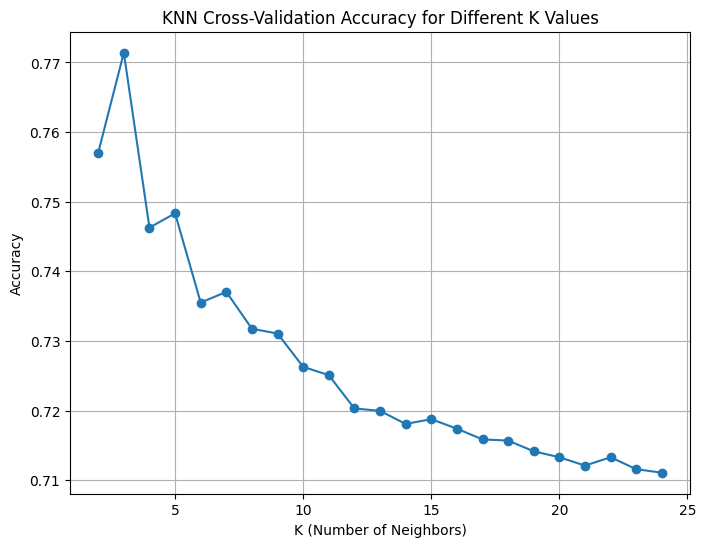

In [ ]:
k_values = list(range(2, 25))
cross_val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # cross validation if data in sequence, result the model no overfitting or no sequence (only pattern)
    scores = cross_val_score(knn,X_train, y_train, cv=5)  # Using 5-fold cross-validation
    cross_val_accuracies.append(scores.mean())

# Find the best K value
best_k = k_values[cross_val_accuracies.index(max(cross_val_accuracies))]
best_accuracy = max(cross_val_accuracies)

print(f"Best K: {best_k}, Accuracy: {best_accuracy * 100:.2f}%")

# Plot the cross-validation accuracy for different K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, cross_val_accuracies, marker='o', linestyle='-')
plt.title('KNN Cross-Validation Accuracy for Different K Values')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = KNN_model.predict(X_test)

In [ ]:
KNN_model.score(X_test, y_test)

0.7772657450076805

In [ ]:
KNN_model.score(X_train, y_train)

0.8916794806082351

In [ ]:
from sklearn.model_selection import learning_curve

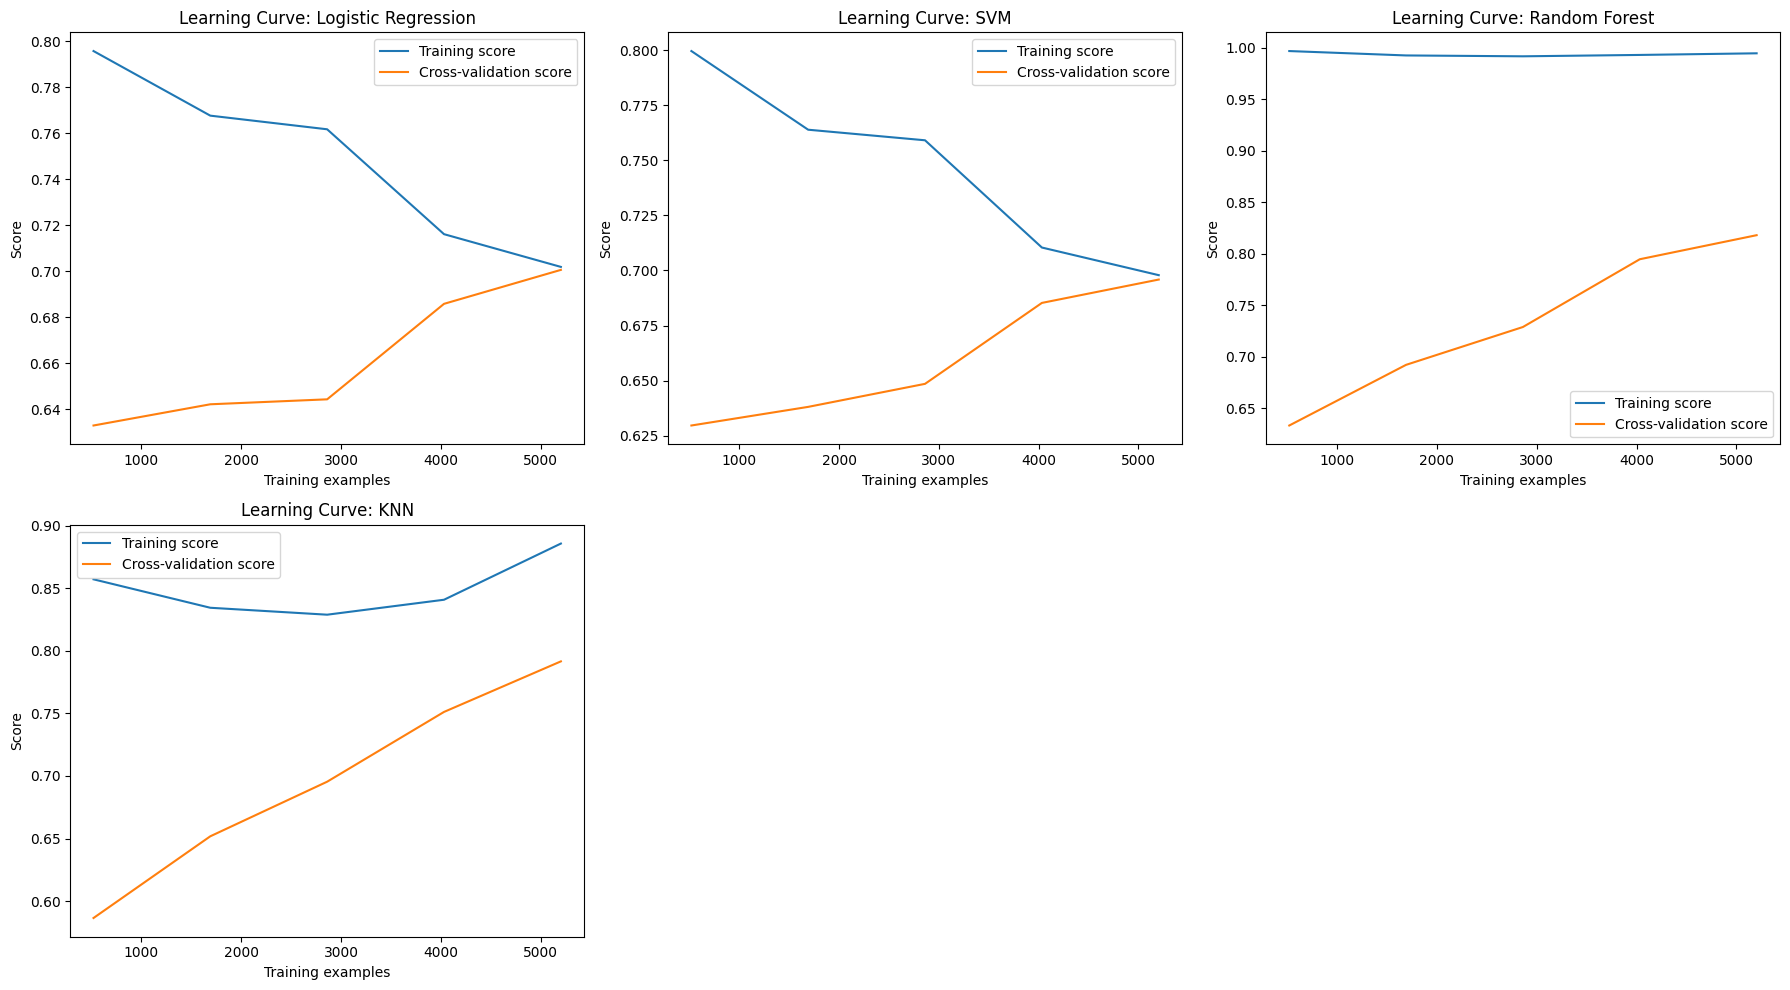

In [ ]:
# Plot learning curves for each model

models = [LR_model, svc_model, RF_model, KNN_model]
model_names = ['Logistic Regression', 'SVM', 'Random Forest', 'KNN']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, model in enumerate(models):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, n_jobs=-1)

    axes[i].plot(train_sizes, train_scores.mean(axis=1), label='Training score')
    axes[i].plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
    axes[i].set_xlabel('Training examples')
    axes[i].set_ylabel('Score')
    axes[i].set_title(f'Learning Curve: {model_names[i]}')
    axes[i].legend()

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()